## Raisin Classification and Prediction

#### Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. 
A total of 900 raisin grains were used, including 450 pieces from both varieties. 
Our target in this classification will be Class features. 
Data source from https://archive.ics.uci.edu/dataset/850/raisin

In [1]:
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
raisin = fetch_ucirepo(id=850) 
  
# data (as pandas dataframes) 
X = raisin.data.features 
y = raisin.data.targets 

In [2]:
X.shape, y.shape

((900, 7), (900, 1))

In [3]:
# concating the two data extracted from the source
data = pd.concat([X,y], axis = 1)

In [4]:
data.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
data.shape, data.columns

((900, 8),
 Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
        'ConvexArea', 'Extent', 'Perimeter', 'Class'],
       dtype='object'))

In [6]:
# check for nulls and quick eda
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [7]:
# Generate a fraction of unseen data from the dataset
unseen_data = data.sample(frac=0.15, random_state=42)
df = data.drop(unseen_data.index)

In [8]:
data.shape, df.shape, unseen_data.shape

((900, 8), (765, 8), (135, 8))

In [9]:
# Now we will Read the raisin csv trasin data to predict on.
data = pd.read_csv('./data/Raisin.csv')

In [10]:
from pycaret.classification import setup, models, create_model, tune_model, finalize_model, save_model

cls = setup(data, target='Class', session_id=42, fix_imbalance=True);

rf = create_model('rf');
tuned_rf =  tune_model(rf);
final_rf= finalize_model(tuned_rf)
final_rf

,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Binary
3,Target mapping,"Besni: 0, Kecimen: 1"
4,Original data shape,"(765, 8)"
5,Transformed data shape,"(766, 8)"
6,Transformed train set shape,"(536, 8)"
7,Transformed test set shape,"(230, 8)"
8,Numeric features,7
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.0000,0.7037,0.7037,0.7037,0.4074,0.4074
1,0.8148,0.0000,0.8148,0.8312,0.8125,0.6296,0.6458
2,0.9444,0.0000,0.9444,0.9451,0.9444,0.8889,0.8895
3,0.8889,0.0000,0.8889,0.8910,0.8887,0.7778,0.7799
4,0.8704,0.0000,0.8704,0.8709,0.8703,0.7407,0.7412
5,0.8868,0.0000,0.8868,0.8892,0.8867,0.7738,0.7760
6,0.9057,0.0000,0.9057,0.9111,0.9055,0.8117,0.8169
7,0.8679,0.0000,0.8679,0.8684,0.8678,0.7356,0.7361
8,0.9245,0.0000,0.9245,0.9245,0.9245,0.8490,0.8490


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.0000,0.7222,0.7225,0.7221,0.4444,0.4447
1,0.8333,0.0000,0.8333,0.8574,0.8305,0.6667,0.6903
2,0.9630,0.0000,0.9630,0.9655,0.9629,0.9259,0.9285
3,0.9259,0.0000,0.9259,0.9355,0.9255,0.8519,0.8614
4,0.8704,0.0000,0.8704,0.8709,0.8703,0.7407,0.7412
5,0.8868,0.0000,0.8868,0.8892,0.8867,0.7738,0.7760
6,0.8868,0.0000,0.8868,0.8961,0.8863,0.7741,0.7831
7,0.8491,0.0000,0.8491,0.8508,0.8487,0.6976,0.6996
8,0.9245,0.0000,0.9245,0.9245,0.9245,0.8490,0.8490


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Area', 'MajorAxisLength',
                                             'MinorAxisLength', 'Eccentricity',
                                             'ConvexArea', 'Extent',
                                             'Perimeter'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={}, criterion='gini',
                                        max_depth=9, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0,
                                        min_samples_leaf=6, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=120,
                                        n_jobs=-1, oob_score=False,
                                        random_state=42, verbose=0,
                                        warm_start=False))],
         verbose=False)

### Predictions/ Findings
The unseen data is imported below into the ***'unseen'*** variable. 
the final_rf model above, make predictions on the unseen dataset. As you see in the model above, the target is the 'Class' feature.

In [11]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
unseen = pd.read_csv('./data/Raisin_unseen.csv')
unseen.shape

(135, 8)

In [13]:
cls = final_rf
unseen_X = unseen.drop('Class', axis=1)
y = unseen['Class']

In [14]:
y_pred = cls.predict(unseen_X)
y_pred

0        Besni
1      Kecimen
2      Kecimen
3        Besni
4      Kecimen
        ...   
130      Besni
131      Besni
132      Besni
133    Kecimen
134    Kecimen
Name: Class, Length: 135, dtype: object

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       Besni       0.82      0.82      0.82        67
     Kecimen       0.82      0.82      0.82        68

    accuracy                           0.82       135
   macro avg       0.82      0.82      0.82       135
weighted avg       0.82      0.82      0.82       135



In [16]:
acc= accuracy_score(y, y_pred)
prec =precision_score(y, y_pred, pos_label= 'Besni')
rec= recall_score(y, y_pred, pos_label= 'Kecimen')
print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}')

Accuracy: 0.8222222222222222
Precision: 0.8208955223880597
Recall: 0.8235294117647058


In [17]:
cm = confusion_matrix(y, y_pred)
cm

array([[55, 12],
       [12, 56]], dtype=int64)

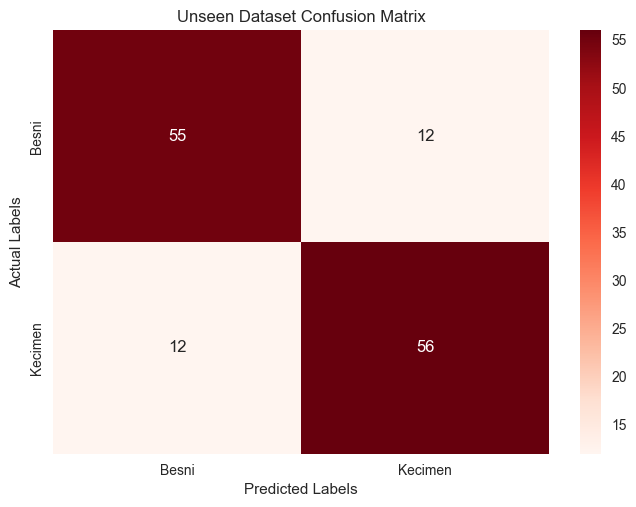

In [18]:
ax= sns.heatmap(cm, annot=True, cmap='Reds')
ax.set_xticklabels(['Besni', 'Kecimen'])
ax.set_yticklabels(['Besni', 'Kecimen'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Unseen Dataset Confusion Matrix');

This classification result is showing the performance of a model in predicting different classes in Raisin dataset.
The Random Forest Classifier predicted the unseen data with 82.22% accuracy and 82.20% precision.
Overall, this classification result suggests that the model has quite a good performance, with high precision, recall, and a high overall accuracy of about 82%.